### Twitter Dataset
## 1 Classification

In [1]:
import pandas as pd
import numpy as np

In [2]:
result = pd.DataFrame()
desired_columns=['name','username','features','likes_count','retweets_count','replies_count','tweet']
with pd.read_json('twitter_features.json', lines=True, chunksize=20000) as reader:
    reader
    for chunk in reader:
        chunk = chunk[desired_columns]
        result = pd.concat([result, chunk], ignore_index=True)
        print(result.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            20000 non-null  object
 1   username        20000 non-null  object
 2   features        20000 non-null  object
 3   likes_count     20000 non-null  int64 
 4   retweets_count  20000 non-null  int64 
 5   replies_count   20000 non-null  int64 
 6   tweet           20000 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            40000 non-null  object
 1   username        40000 non-null  object
 2   features        40000 non-null  object
 3   likes_count     40000 non-null  int64 
 4   retweets_count  40000 non-null  int64 
 5   replies_count   4000

In [3]:
result.head()

,name,username,features,likes_count,retweets_count,replies_count,tweet
0,Barack Obama,barackobama,"[0.032840799999999996, 0.279632999999999, 0.30...",314,1698,111,JoeBiden The people I grew up with and my neig...
1,Barack Obama,barackobama,"[-0.1898005, 0.23507037500000003, 0.49903625, ...",566,2252,98,VP Biden War should always be the absolute las...
2,Barack Obama,barackobama,"[-0.094298928571428, 0.136600214285714, 0.4788...",217,748,212,VP Biden on Iran These are the most crippling ...
3,Barack Obama,barackobama,"[-0.1626531, 0.21753979999999998, 0.3880757999...",103,531,83,Watch live JoeBiden lays out the ObamaBiden pl...
4,Barack Obama,barackobama,"[-0.30785029999999997, 0.2269174, 0.2245550999...",66,257,46,Be sure to follow OFADebates during tonights V...


In [14]:
print(len(result.groupby('name').size().loc[(result.groupby('name').size()>10000).values]))
result.groupby('name').size().loc[(result.groupby('name').size()>10000).values].sort_values()

12


name
Gov Mike Huckabee    11022
Andrew Yang          11087
Marco Rubio          11957
Amy Klobuchar        12008
Bernie Sanders       14201
Elizabeth Warren     14596
Ted Cruz             15201
Newt Gingrich        15489
Chuck Schumer        18513
Andrew Cuomo         22324
Donna Brazile        35426
Cory Booker          48228
dtype: int64

In [15]:
##### check this again
noisy_politicians=['Cory Booker','Donna Brazile','Andrew Cuomo','Chuck Schumer']
df = result.loc[result.name.isin(noisy_politicians)].reset_index().drop(columns='index')
df.head()

,name,username,features,likes_count,retweets_count,replies_count,tweet
0,Cory Booker,corybooker,"[-0.058288375, 0.257743187499999, 0.2943871249...",1993,173,90,We may face setbacks while striving for progre...
1,Cory Booker,corybooker,"[-0.11479233333333301, 0.428557749999999, 0.50...",410,75,37,There is no shortage of information on the COV...
2,Cory Booker,corybooker,"[-0.13389672368421002, 0.127146184210526, 0.39...",695,192,44,Too often we see low turnout in our local and ...
3,Cory Booker,corybooker,"[-0.1127484, 0.2214909, 0.330239599999999, -0....",263,66,45,My friend and colleague Senator Patty Murray i...
4,Cory Booker,corybooker,"[-0.066321604166666, 0.30462470833333305, 0.25...",952,133,40,Over 60 years ago Brown v Board declared that ...


In [16]:
## creating the icml dataset
l = df.features.tolist()
icml_data = pd.DataFrame(l,columns=[i for i in range(len(df.features[1]))])
icml_data['username'] = df['username'].reset_index().drop(columns='index')
icml_data.head()

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,username
0,-0.058288,0.257743,0.294387,-0.151130,-0.078774,0.109748,-0.317426,0.052978,-0.050052,-0.108519,...,0.001469,0.796875,0.144055,0.468750,0.288111,1,1.000000,4.215352,0.000000,corybooker
1,-0.114792,0.428558,0.507025,-0.286974,-0.125520,0.004136,-0.169271,0.188063,-0.059060,-0.073951,...,-0.000634,0.562500,0.219493,0.479167,0.288424,1,1.000000,2.790867,0.000000,corybooker
2,-0.133897,0.127146,0.398643,-0.277050,-0.047119,0.053058,-0.230513,0.291709,-0.189373,0.104121,...,-0.000362,0.680055,0.209965,0.486842,0.288575,1,1.000000,3.625592,0.000000,corybooker
3,-0.112748,0.221491,0.330240,-0.298852,0.193633,0.179657,-0.082949,0.143294,-0.220436,-0.146584,...,0.001208,0.485000,0.234041,0.475000,0.288314,1,1.000000,2.659551,0.000000,corybooker
4,-0.066322,0.304625,0.252383,-0.190404,-0.023866,0.085650,-0.190102,0.230729,-0.145362,-0.011991,...,0.000235,0.776042,0.223676,0.489583,0.288612,2,0.979167,3.928020,0.020833,corybooker


In [17]:
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.manifold import Isomap, TSNE, MDS, LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [19]:
%%time

X_ = df['tweet']
y_ = le.fit_transform(df['username']) 

pipe = Pipeline([('vectorizer', CountVectorizer()),  
                 ('tfidf', TfidfTransformer()), 
                 ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

classifier = pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57     15968
           1       0.95      0.09      0.16     11591
           2       1.00      0.03      0.06      7365
           3       1.00      0.00      0.00      6159

    accuracy                           0.42     41083
   macro avg       0.84      0.28      0.20     41083
weighted avg       0.75      0.42      0.28     41083

CPU times: user 10.1 s, sys: 34.5 ms, total: 10.1 s
Wall time: 4.09 s


In [20]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (25,15)

Confusion matrix, without normalization
[[15951    17     0     0]
 [10571  1020     0     0]
 [ 7122     5   238     0]
 [ 6120    37     0     2]]
Normalized confusion matrix
[[9.98935371e-01 1.06462926e-03 0.00000000e+00 0.00000000e+00]
 [9.12000690e-01 8.79993098e-02 0.00000000e+00 0.00000000e+00]
 [9.67006110e-01 6.78886626e-04 3.23150034e-02 0.00000000e+00]
 [9.93667803e-01 6.00746874e-03 0.00000000e+00 3.24728040e-04]]


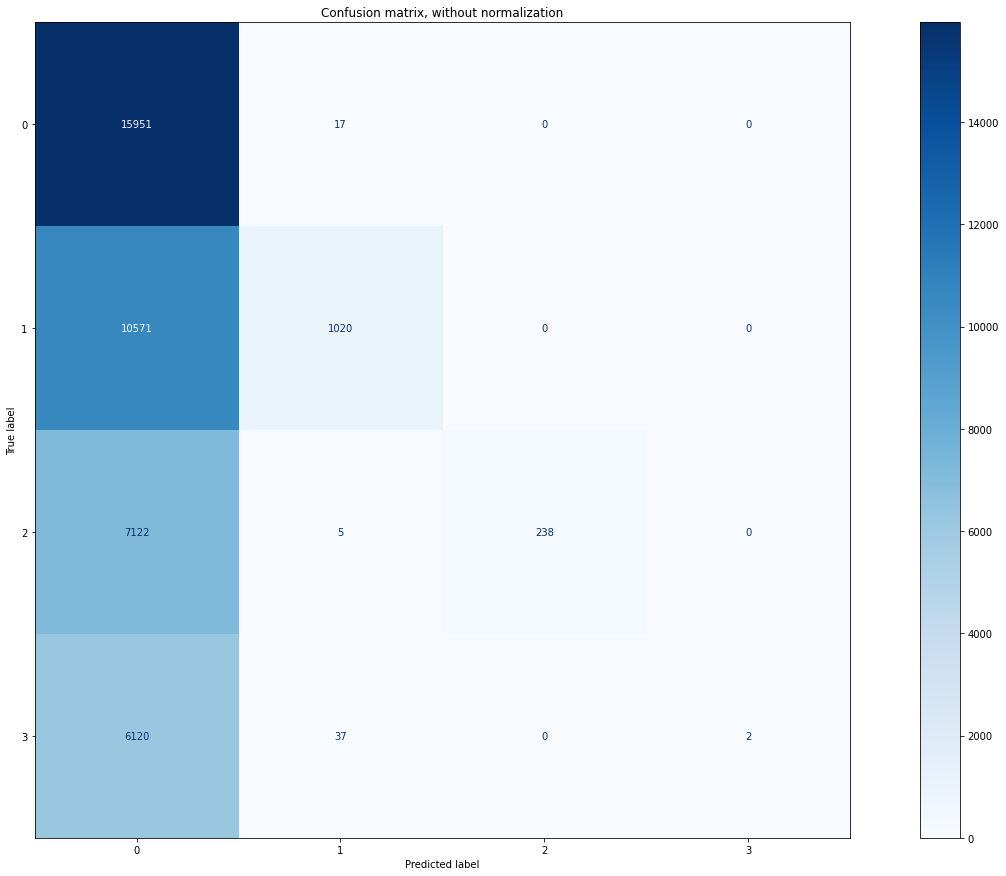

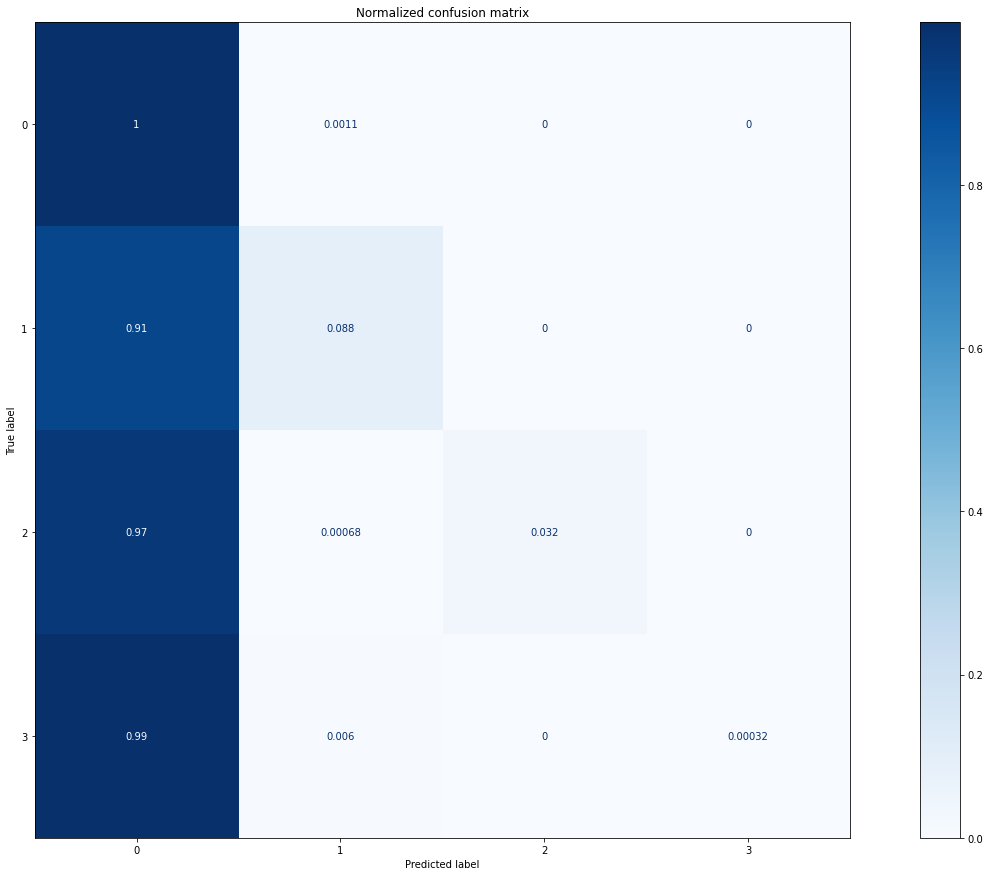

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

#class_names= ['dem','rep']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

X_ =  icml_data.iloc[:,0:119]
y_ = le.fit_transform(icml_data['username'])

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_jobs=5, max_depth=13))])

X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.33, random_state=42)

classifier = pipe.fit(X_train, y_train)

In [22]:
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      1.00      0.57     15968
           1       0.95      0.09      0.16     11591
           2       1.00      0.03      0.06      7365
           3       1.00      0.00      0.00      6159

    accuracy                           0.42     41083
   macro avg       0.84      0.28      0.20     41083
weighted avg       0.75      0.42      0.28     41083



Confusion matrix, without normalization
[[15951    17     0     0]
 [10571  1020     0     0]
 [ 7122     5   238     0]
 [ 6120    37     0     2]]
Normalized confusion matrix
[[9.98935371e-01 1.06462926e-03 0.00000000e+00 0.00000000e+00]
 [9.12000690e-01 8.79993098e-02 0.00000000e+00 0.00000000e+00]
 [9.67006110e-01 6.78886626e-04 3.23150034e-02 0.00000000e+00]
 [9.93667803e-01 6.00746874e-03 0.00000000e+00 3.24728040e-04]]


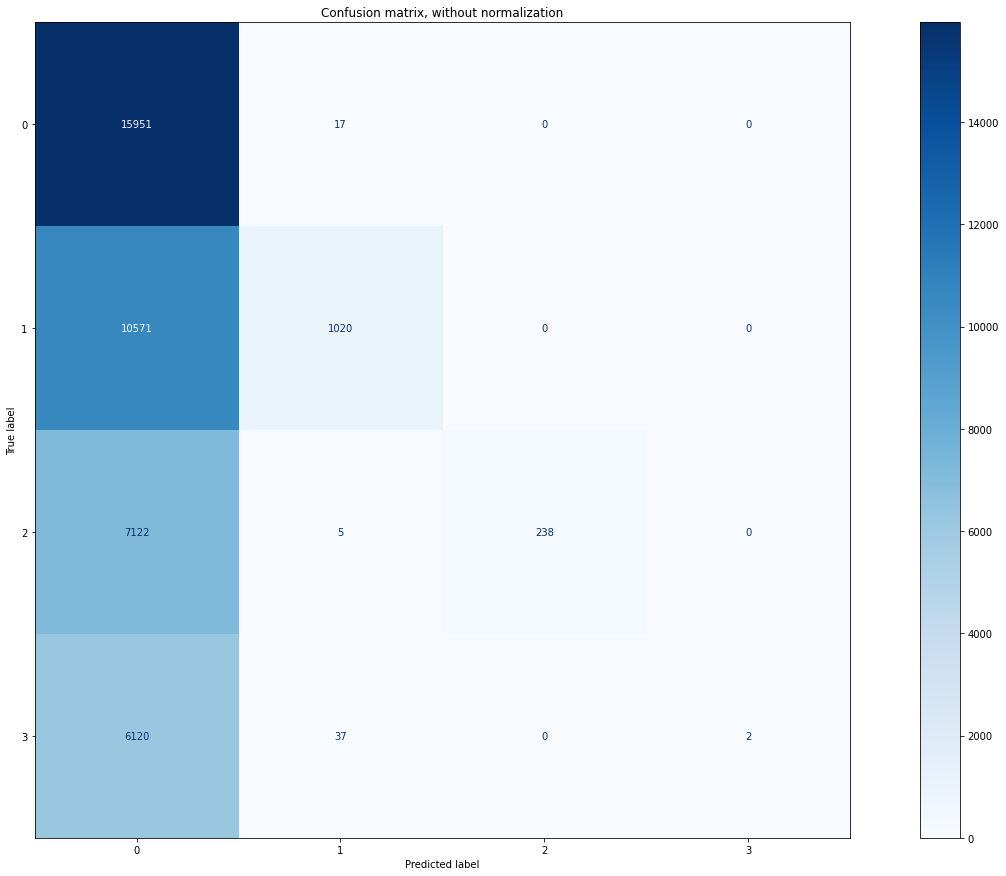

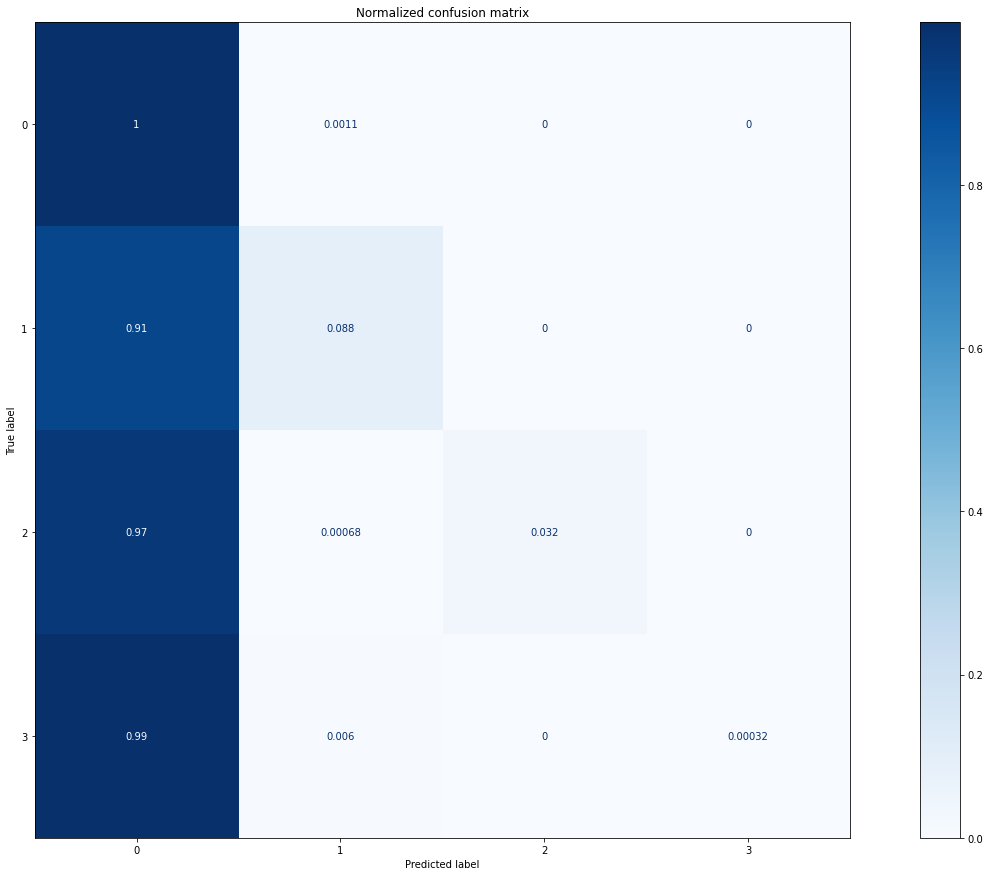

In [23]:
#class_names= ['dem','rep']
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 #display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()